In [2]:
import numpy as np
from datascience import *
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn import *
from sklearn.model_selection import train_test_split
from datetime import datetime, timezone
import missingno as msno
import seaborn as sns
import math

In [3]:
gngData = pd.read_csv("Participant_984.csv")
unixStart = 1582733610
totalSecs = 2189
gngData['1'] = gngData['1']/50 + unixStart
gngData

C:\Users\Viraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (33,60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,1,2,3,4,5,6,7,8,9,10,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,1.582734e+09,136.770523,61.213627,197.984146,75.556900,124.152428,63.146126,187.298447,61.006313,148.139404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.582734e+09,136.770523,61.213627,197.984146,75.556900,124.152428,63.146126,187.298447,61.006313,148.139404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.582734e+09,136.770523,61.213627,197.984146,75.556900,124.152428,63.146126,187.298447,61.006313,148.139404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.582734e+09,136.770523,61.213627,197.984146,75.556900,124.152428,63.146126,187.298447,61.006313,148.139404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.582734e+09,136.770523,61.213627,197.984146,75.556900,124.152428,63.146126,187.298447,61.006313,148.139404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109445,1.582736e+09,31.240822,11.728950,42.969772,19.511871,8.391468,1.453402,9.844770,6.938075,36.472679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109446,1.582736e+09,31.196617,11.730339,42.926956,19.466278,8.353993,1.445299,9.799192,6.908705,36.450577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109447,1.582736e+09,31.167786,11.740526,42.908310,19.427259,8.324205,1.441594,9.765699,6.882621,36.421742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109448,1.582736e+09,31.138952,11.750713,42.889668,19.388239,8.286732,1.433490,9.720122,6.853251,36.413101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
gngLog = pd.read_csv("984_gonogo.csv")
responseTime = gngLog['key_exp.rt']
gngLog = gngLog[['condition', 'corAns', 'key_exp.keys', 'unixbeg', 'unixend']]
gngLog['unixbeg'] = round(gngLog['unixbeg']/1000)
gngLog['unixend'] = round(gngLog['unixend']/1000)
gngLog

,condition,corAns,key_exp.keys,unixbeg,unixend
0,go,space,NaN,1.582734e+09,1.582734e+09
1,go,space,NaN,1.582734e+09,1.582734e+09
2,nogo,none,NaN,1.582734e+09,1.582734e+09
3,go,space,NaN,1.582734e+09,1.582734e+09
4,go,space,NaN,1.582734e+09,1.582734e+09
...,...,...,...,...,...
327,go,space,space,1.582735e+09,1.582735e+09
328,go,space,space,1.582735e+09,1.582735e+09
329,go,space,space,1.582735e+09,1.582735e+09
330,NaN,NaN,NaN,NaN,NaN


In [5]:
# df.loc[df['B'] == 3, 'A']

# gngLog.iloc[3]

def refineLog():
    result = gngLog.copy()
    changes = False
    for i in range(len(result)):
        if(i<len(result)):
            if(result['corAns'].iloc[i] == "space" and result['corAns'].iloc[i+1] == "space"):
                result.at[i, 'unixend'] = result['unixend'].iloc[i+1]
                result.drop(index=i+1, inplace=True)
#     result.drop(result[result['corAns'].isna()].index, inplace=True)
    result = result[result['corAns'] != 'none']
    result = result.dropna(subset=['corAns'])
    result = result.reset_index(drop=True)


    return result

def getPeriodTime(start_unix, end_unix):
    
    print(start_unix)
    result = gngData.copy()
    result = result[(result['1'] >= start_unix-30) & (result['1'] <= end_unix+10)] 
    
    return result

def getBaseline(start_unix):
    print(start_unix)
    result = gngData.copy()
    startBaseline = start_unix - 25
    endBaseline = start_unix - 20
    print("start", startBaseline)
    print("end", endBaseline)
    result = result[(result['1'] >= startBaseline) & (result['1'] <= endBaseline)] 
    return result
    
#     print(begVal)

In [6]:
# Process:


In [7]:
# getPeriodTime()
gngLog

,condition,corAns,key_exp.keys,unixbeg,unixend
0,go,space,NaN,1.582734e+09,1.582734e+09
1,go,space,NaN,1.582734e+09,1.582734e+09
2,nogo,none,NaN,1.582734e+09,1.582734e+09
3,go,space,NaN,1.582734e+09,1.582734e+09
4,go,space,NaN,1.582734e+09,1.582734e+09
...,...,...,...,...,...
327,go,space,space,1.582735e+09,1.582735e+09
328,go,space,space,1.582735e+09,1.582735e+09
329,go,space,space,1.582735e+09,1.582735e+09
330,NaN,NaN,NaN,NaN,NaN


In [8]:
z = refineLog()
z

,condition,corAns,key_exp.keys,unixbeg,unixend
0,go,space,NaN,1.582734e+09,1.582734e+09
1,go,space,NaN,1.582734e+09,1.582734e+09
2,go,space,NaN,1.582734e+09,1.582734e+09
3,go,space,NaN,1.582734e+09,1.582734e+09
4,go,space,NaN,1.582734e+09,1.582734e+09
...,...,...,...,...,...
169,go,space,space,1.582735e+09,1.582735e+09
170,go,space,space,1.582735e+09,1.582735e+09
171,go,space,space,1.582735e+09,1.582735e+09
172,go,space,space,1.582735e+09,1.582735e+09


In [9]:
getPeriodTime(gngLog['unixbeg'].iloc[132], gngLog['unixend'].iloc[132])

1582734585.0


,1,2,3,4,5,6,7,8,9,10,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
47250,1.582735e+09,28.750761,9.876713,38.627476,18.874048,5.284076,0.608998,5.892974,4.675088,38.448402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47251,1.582735e+09,28.764223,9.857728,38.621952,18.906494,5.284076,0.608998,5.892974,4.675088,38.455132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47252,1.582735e+09,28.749806,9.862822,38.612629,18.886984,5.290806,0.599506,5.890212,4.691310,38.433029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47253,1.582735e+09,28.742121,9.858422,38.600544,18.883698,5.276390,0.604599,5.880889,4.671801,38.432072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47254,1.582735e+09,28.748852,9.848930,38.597782,18.899921,5.276390,0.604599,5.880889,4.671801,38.424389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49296,1.582735e+09,28.878639,9.696355,38.574993,19.182285,5.896208,0.599047,6.495155,5.297170,38.156082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49297,1.582735e+09,28.864224,9.701448,38.565670,19.162775,5.888522,0.594649,6.483070,5.293883,38.156082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49298,1.582735e+09,28.849808,9.706541,38.556347,19.143267,5.874105,0.599742,6.473748,5.274374,38.141666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49299,1.582735e+09,28.856537,9.697049,38.553585,19.159489,5.866420,0.595343,6.461663,5.271087,38.127251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
getBaseline(gngLog['unixbeg'].iloc[132])


1582734585.0
start 1582734560.0
end 1582734565.0


,1,2,3,4,5,6,7,8,9,10,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
47500,1.582735e+09,29.035267,9.719276,38.754543,19.315990,5.513782,0.513611,6.027293,5.000181,38.522434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47501,1.582735e+09,29.035267,9.719276,38.754543,19.315990,5.513782,0.513611,6.027293,5.000181,38.522434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47502,1.582735e+09,29.042952,9.723676,38.766628,19.319277,5.528198,0.508518,6.036616,5.019691,38.529167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47503,1.582735e+09,29.029491,9.742662,38.772152,19.286831,5.542614,0.503424,6.045939,5.039200,38.543583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47504,1.582735e+09,29.029491,9.742662,38.772152,19.286831,5.542614,0.503424,6.045939,5.039200,38.542625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47746,1.582735e+09,29.088154,9.629445,38.717598,19.458710,5.594505,0.506434,6.100839,5.088080,38.600376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47747,1.582735e+09,29.088154,9.629445,38.717598,19.458710,5.586819,0.502035,6.088754,5.084794,38.585960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47748,1.582735e+09,29.088154,9.629445,38.717598,19.458710,5.586819,0.502035,6.088754,5.084794,38.578274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47749,1.582735e+09,29.080469,9.625046,38.705513,19.455423,5.579133,0.497636,6.076669,5.081507,38.562900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
z.iloc[4]


condition                 go
corAns                 space
key_exp.keys             NaN
unixbeg         1582734281.0
unixend         1582734305.0
Name: 4, dtype: object

In [12]:
z.iloc[5]


condition                 go
corAns                 space
key_exp.keys             NaN
unixbeg         1582734291.0
unixend         1582734292.0
Name: 5, dtype: object

In [13]:
z.iloc[6]


condition                 go
corAns                 space
key_exp.keys             NaN
unixbeg         1582734294.0
unixend         1582734334.0
Name: 6, dtype: object

In [14]:
z.iloc[7]


condition                 go
corAns                 space
key_exp.keys             NaN
unixbeg         1582734302.0
unixend         1582734344.0
Name: 7, dtype: object

In [15]:
z.iloc[8]


condition                 go
corAns                 space
key_exp.keys            None
unixbeg         1582734323.0
unixend         1582734324.0
Name: 8, dtype: object

In [16]:
z.iloc[12]


condition                 go
corAns                 space
key_exp.keys           space
unixbeg         1582734343.0
unixend         1582734344.0
Name: 12, dtype: object

In [34]:
def beerLambertLaw(df):
    wavelengths = [839, 757, 839, 757, 839, 757, 839, 757, 839, 757, 839, 757, 839, 757, 839, 757]
    ecOxy = 0.0055
    ecDeoxy = 0.0040 
    optodeDist = 35
    
    wavelength_cols = ['2', '3', '6', '7', '10', '11', '14', '15', '18', '19', '22', '23', '26', '27', '30', '31']

    oxy_data = pd.DataFrame()
    deoxy_data = pd.DataFrame()

    for i in range(0, len(wavelength_cols), 2):
        oxy_col = wavelength_cols[i]
        deoxy_col = wavelength_cols[i+1]

        PLF = optodeDist * 2

        oxy_conc = np.log(1 / (df[oxy_col] / df['1'])) / (ecOxy * PLF)
        deoxy_conc = np.log(1 / (df[deoxy_col] / df['1'])) / (ecDeoxy * PLF)

        oxy_data['wavelength ' + str(i//2+1)] = oxy_conc
        deoxy_data['wavelength ' + str(i//2+1)] = deoxy_conc

    processed_data = pd.concat([oxy_data, deoxy_data], axis=1)
    return processed_data

In [35]:
print(gngData.columns)

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61'],
      dtype='object')


In [36]:
fgh = beerLambertLaw(gngData)
fgh

C:\Users\Viraj\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,wavelength 1,wavelength 2,wavelength 3,wavelength 4,wavelength 5,wavelength 6,wavelength 7,wavelength 8,wavelength 1,wavelength 2,wavelength 3,wavelength 4,wavelength 5,wavelength 6,wavelength 7,wavelength 8
0,42.244454,42.495868,42.037053,42.270133,42.697646,42.416858,42.813829,42.573780,60.957320,60.846314,59.852147,60.669990,61.346156,60.911460,61.633975,60.863986
1,42.244454,42.495868,42.037053,42.270133,42.697646,42.416858,42.813829,42.573780,60.957320,60.846314,59.852147,60.669990,61.346156,60.911460,61.633975,60.863986
2,42.244454,42.495868,42.037053,42.270133,42.697646,42.416858,42.813829,42.573780,60.957320,60.846314,59.852147,60.669990,61.346156,60.911460,61.633975,60.863986
3,42.244454,42.495868,42.037053,42.270133,42.697646,42.416858,42.813829,42.573780,60.957320,60.846314,59.852147,60.669990,61.346156,60.911460,61.633975,60.863986
4,42.244454,42.495868,42.037053,42.270133,42.697646,42.416858,42.813829,42.573780,60.957320,60.846314,59.852147,60.669990,61.346156,60.911460,61.633975,60.863986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109445,46.079727,49.494040,45.677551,46.595299,NaN,47.980703,53.837489,51.070912,66.858430,74.316119,63.805464,67.734717,NaN,76.077335,NaN,75.281081
109446,46.083405,49.505665,45.679126,46.601444,NaN,47.992355,53.850185,51.096143,66.858008,74.336088,63.805374,67.743016,NaN,76.125167,NaN,75.276613
109447,46.085807,49.514943,45.681181,46.608289,NaN,48.004060,53.899989,51.117726,66.854907,74.345254,63.804055,67.747626,NaN,76.173648,NaN,75.302766
109448,46.088211,49.526662,45.681798,46.616626,NaN,48.019693,53.937570,51.147911,66.851810,74.365387,63.806424,67.750250,NaN,76.219888,NaN,75.312530


In [33]:
gngData

,1,2,3,4,5,6,7,8,9,10,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,1.582734e+09,136.770523,61.213627,197.984146,75.556900,124.152428,63.146126,187.298447,61.006313,148.139404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.582734e+09,136.770523,61.213627,197.984146,75.556900,124.152428,63.146126,187.298447,61.006313,148.139404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.582734e+09,136.770523,61.213627,197.984146,75.556900,124.152428,63.146126,187.298447,61.006313,148.139404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.582734e+09,136.770523,61.213627,197.984146,75.556900,124.152428,63.146126,187.298447,61.006313,148.139404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.582734e+09,136.770523,61.213627,197.984146,75.556900,124.152428,63.146126,187.298447,61.006313,148.139404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109445,1.582736e+09,31.240822,11.728950,42.969772,19.511871,8.391468,1.453402,9.844770,6.938075,36.472679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109446,1.582736e+09,31.196617,11.730339,42.926956,19.466278,8.353993,1.445299,9.799192,6.908705,36.450577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109447,1.582736e+09,31.167786,11.740526,42.908310,19.427259,8.324205,1.441594,9.765699,6.882621,36.421742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109448,1.582736e+09,31.138952,11.750713,42.889668,19.388239,8.286732,1.433490,9.720122,6.853251,36.413101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
gngLog


,condition,corAns,key_exp.keys,unixbeg,unixend
0,go,space,NaN,1.582734e+09,1.582734e+09
1,go,space,NaN,1.582734e+09,1.582734e+09
2,nogo,none,NaN,1.582734e+09,1.582734e+09
3,go,space,NaN,1.582734e+09,1.582734e+09
4,go,space,NaN,1.582734e+09,1.582734e+09
...,...,...,...,...,...
327,go,space,space,1.582735e+09,1.582735e+09
328,go,space,space,1.582735e+09,1.582735e+09
329,go,space,space,1.582735e+09,1.582735e+09
330,NaN,NaN,NaN,NaN,NaN


In [44]:
correct = []

for i in range(len(gngLog)):
    if(gngLog['corAns'].iloc[i] == gngLog['key_exp.keys'].iloc[i]):
        correct.append(True)
    else:
        correct.append(False)

In [45]:
correct

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,

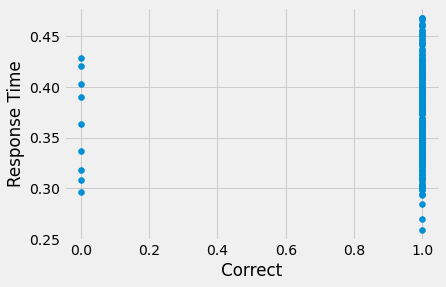

In [50]:
plt.scatter(correct, responseTime)

# set the x and y labels
plt.ylabel('Response Time')
plt.xlabel('Correct')

# show the plot
plt.show()